In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## Read Dataset

### 按性別和年齡分組的人口結構
數據以絕對值（以千為單位）呈現

In [3]:
df_AgeSex = pd.read_csv("./dataset/US_PopAgeStruct_20230713030811.csv")
df_AgeSex.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8624\714895476.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_AgeSex = pd.read_csv("./dataset/US_PopAgeStruct_20230713030811.csv")


,Year,Economy,Economy Label,Sex,Sex Label,AgeClass,AgeClass Label,Absolute value in thousands,Absolute value in thousands Footnote,Absolute value in thousands Missing value
0,1950,1,Individual economies,0,Both sexes,0,All age classes,NaN,NaN,Not applicable
1,1950,1,Individual economies,0,Both sexes,1,[0-4],NaN,NaN,Not applicable
2,1950,1,Individual economies,0,Both sexes,2,[5-9],NaN,NaN,Not applicable
3,1950,1,Individual economies,0,Both sexes,3,[10-14],NaN,NaN,Not applicable
4,1950,1,Individual economies,0,Both sexes,4,[15-19],NaN,NaN,Not applicable


### 撫養比
每百名工作年齡人口（15-64歲）中有多少人（包括年幼和年長者）依賴工作年齡人口

In [4]:
df_Dependency = pd.read_csv("./dataset/US_PopDependency_20230713030812.csv")
df_Dependency.head()

,Series,Series Label,Year,Economy,Economy Label,Persons per hundred persons aged 15-64,Persons per hundred persons aged 15-64 Footnote,Persons per hundred persons aged 15-64 Missing value
0,7120,Total dependency ratio,1950,1,Individual economies,NaN,NaN,Not applicable
1,7120,Total dependency ratio,1950,4,Afghanistan,78.166,NaN,NaN
2,7120,Total dependency ratio,1950,8,Albania,82.090,NaN,NaN
3,7120,Total dependency ratio,1950,12,Algeria,78.916,NaN,NaN
4,7120,Total dependency ratio,1950,16,American Samoa,94.865,NaN,NaN


### 年平均人口增長率
數據集按區間結構排列，通常以五年為一個週期，並包含增長率、相關註釋以及缺失值標記等具體細節

In [5]:
df_Growth = pd.read_csv("./dataset/US_PopGR_20230713030828.csv")
df_Growth.head()

,Period,Period Label,Economy,Economy Label,Annual average growth rate,Annual average growth rate Footnote,Annual average growth rate Missing value
0,20162021,2016-2021,1,Individual economies,NaN,NaN,Not applicable
1,20162021,2016-2021,4,Afghanistan,2.92927,NaN,NaN
2,20162021,2016-2021,8,Albania,-0.18378,NaN,NaN
3,20162021,2016-2021,12,Algeria,1.81799,NaN,NaN
4,20162021,2016-2021,16,American Samoa,-2.27006,NaN,NaN


### 總人口數據
數據集以五年為一個區間進行劃分，包括絕對人口數（以千為單位）和佔總人口的城市人口百分比

In [6]:
df_Total = pd.read_csv("./dataset/US_PopTotal_20230713030810.csv")
df_Total.head()

,Year,Economy,Economy Label,Absolute value in thousands,Absolute value in thousands Footnote,Absolute value in thousands Missing value,Urban population as percentage of total population,Urban population as percentage of total population Footnote,Urban population as percentage of total population Missing value
0,1950,1,Individual economies,NaN,NaN,Not applicable,NaN,NaN,Not applicable
1,1950,4,Afghanistan,7480.461,NaN,NaN,6.00000,NaN,NaN
2,1950,8,Albania,1252.582,NaN,NaN,20.52805,NaN,NaN
3,1950,12,Algeria,9019.866,NaN,NaN,22.21320,NaN,NaN
4,1950,16,American Samoa,19.032,NaN,NaN,61.76874,NaN,NaN


## Preprocessing

### 缺失值分析

In [7]:
# 顯示每個欄位的缺失值數量和比例
def missing_values_analysis(df):
    total = df.isnull().sum()
    percent = round((df.isnull().sum() / df.isnull().count()) * 100, 4)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [8]:
print("< 缺失值分析 >")
print("\n[ PopAgeStruct ]")
print(missing_values_analysis(df_AgeSex))
print("\n[ PopDependency ]")
print(missing_values_analysis(df_Dependency))
print("\n[ PopGR ]")
print(missing_values_analysis(df_Growth))
print("\n[ PopTotal ]")
print(missing_values_analysis(df_Total))

< 缺失值分析 >

[ PopAgeStruct ]
                                             Total  Percent
Year                                             0   0.0000
Economy                                          0   0.0000
Economy Label                                    0   0.0000
Sex                                              0   0.0000
Sex Label                                        0   0.0000
AgeClass                                         0   0.0000
AgeClass Label                                   0   0.0000
Absolute value in thousands                 174535   8.3763
Absolute value in thousands Footnote       2083683  99.9999
Absolute value in thousands Missing value  1909151  91.6237

[ PopDependency ]
                                                    Total   Percent
Series                                                  0    0.0000
Series Label                                            0    0.0000
Year                                                    0    0.0000
Economy              

### 缺失值處理

#### 刪除含有過多缺失值的欄位: 若某欄位的缺失值超過50%，則刪除該欄位。

In [9]:
df_AgeSex_NMiss = df_AgeSex.drop(columns=[
    'Absolute value in thousands Footnote', 
    'Absolute value in thousands Missing value'
])
df_Dependency_NMiss = df_Dependency.drop(columns=[
    'Persons per hundred persons aged 15-64 Footnote', 
    'Persons per hundred persons aged 15-64 Missing value'
])
df_Growth_NMiss = df_Growth.drop(columns=[
    'Annual average growth rate Footnote', 
    'Annual average growth rate Missing value'
])
df_Total_NMiss = df_Total.drop(columns=[
    'Absolute value in thousands Footnote', 
    'Absolute value in thousands Missing value', 
    'Urban population as percentage of total population Footnote', 
    'Urban population as percentage of total population Missing value'
])

#### 填補缺失值: 對於數值型欄位，使用平均值來填補缺失值；對於類別型欄位，我們使用眾數來填補缺失值。

In [10]:
df_AgeSex_NMiss['Absolute value in thousands'].fillna(df_AgeSex_NMiss['Absolute value in thousands'].mean(), inplace=True)
df_Dependency_NMiss['Persons per hundred persons aged 15-64'].fillna(df_Dependency_NMiss['Persons per hundred persons aged 15-64'].mean(), inplace=True)
df_Growth_NMiss['Annual average growth rate'].fillna(df_Growth_NMiss['Annual average growth rate'].mean(), inplace=True)
df_Total_NMiss['Absolute value in thousands'].fillna(df_Total_NMiss['Absolute value in thousands'].mean(), inplace=True)
df_Total_NMiss['Urban population as percentage of total population'].fillna(df_Total_NMiss['Urban population as percentage of total population'].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8624\3632836841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_AgeSex_NMiss['Absolute value in thousands'].fillna(df_AgeSex_NMiss['Absolute value in thousands'].mean(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8624\3632836841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

#### 刪除缺失值所在的行

In [47]:
'''
df_AgeSex_NMiss = df_AgeSex_NMiss.dropna(subset=['Absolute value in thousands'])
df_Dependency_NMiss = df_Dependency_NMiss.dropna(subset=['Persons per hundred persons aged 15-64'])
df_Growth_NMiss = df_Growth_NMiss.dropna(subset=['Annual average growth rate'])
df_Total_NMiss = df_Total_NMiss.dropna(subset=['Absolute value in thousands', 'Urban population as percentage of total population'])
'''

"\ndf_AgeSex_NMiss = df_AgeSex_NMiss.dropna(subset=['Absolute value in thousands'])\ndf_Dependency_NMiss = df_Dependency_NMiss.dropna(subset=['Persons per hundred persons aged 15-64'])\ndf_Growth_NMiss = df_Growth_NMiss.dropna(subset=['Annual average growth rate'])\ndf_Total_NMiss = df_Total_NMiss.dropna(subset=['Absolute value in thousands', 'Urban population as percentage of total population'])\n"

#### 檢查缺失值是否已處理

In [11]:
print("< 缺失值分析 >")
print("\n[ PopAgeStruct ]")
print(missing_values_analysis(df_AgeSex_NMiss))
print("\n[ PopDependency ]")
print(missing_values_analysis(df_Dependency_NMiss))
print("\n[ PopGR ]")
print(missing_values_analysis(df_Growth_NMiss))
print("\n[ PopTotal ]")
print(missing_values_analysis(df_Total_NMiss))

< 缺失值分析 >

[ PopAgeStruct ]
                             Total  Percent
Year                             0      0.0
Economy                          0      0.0
Economy Label                    0      0.0
Sex                              0      0.0
Sex Label                        0      0.0
AgeClass                         0      0.0
AgeClass Label                   0      0.0
Absolute value in thousands      0      0.0

[ PopDependency ]
                                        Total  Percent
Series                                      0      0.0
Series Label                                0      0.0
Year                                        0      0.0
Economy                                     0      0.0
Economy Label                               0      0.0
Persons per hundred persons aged 15-64      0      0.0

[ PopGR ]
                            Total  Percent
Period                          0      0.0
Period Label                    0      0.0
Economy                         

In [12]:
df_Growth_NMiss['Start_Year'] = df_Growth_NMiss['Period'].apply(lambda x: int(str(x)[:-4]))
df_Growth_NMiss['End_Year'] = df_Growth_NMiss['Period'].apply(lambda x: int(str(x)[-4:]))
df_Growth_NMiss.head()

,Period,Period Label,Economy,Economy Label,Annual average growth rate,Start_Year,End_Year
0,20162021,2016-2021,1,Individual economies,1.395542,2016,2021
1,20162021,2016-2021,4,Afghanistan,2.929270,2016,2021
2,20162021,2016-2021,8,Albania,-0.183780,2016,2021
3,20162021,2016-2021,12,Algeria,1.817990,2016,2021
4,20162021,2016-2021,16,American Samoa,-2.270060,2016,2021


### 正規化
由於之後需要使用到計算距離或相似度的演算法(如: K-means分群)，因此對數值型的欄位進行Min-Max Normalization

In [13]:
df_AgeSex_Normalize = df_AgeSex_NMiss.copy()
df_Dependency_Normalize = df_Dependency_NMiss.copy()
df_Growth_Normalize = df_Growth_NMiss.copy()
df_Total_Normalize = df_Total_NMiss.copy()

In [14]:
scaler = MinMaxScaler()
df_AgeSex_Normalize['Absolute value in thousands'] = scaler.fit_transform(df_AgeSex_NMiss[['Absolute value in thousands']].values.reshape(-1, 1))
df_Dependency_Normalize['Persons per hundred persons aged 15-64'] = scaler.fit_transform(df_Dependency_NMiss[['Persons per hundred persons aged 15-64']].values.reshape(-1, 1))
df_Growth_Normalize['Annual average growth rate'] = scaler.fit_transform(df_Growth_NMiss[['Annual average growth rate']].values.reshape(-1, 1))
df_Total_Normalize['Absolute value in thousands'] = scaler.fit_transform(df_Total_NMiss[['Absolute value in thousands']].values.reshape(-1, 1))
df_Total_Normalize['Urban population as percentage of total population'] = scaler.fit_transform(df_Total_NMiss[['Urban population as percentage of total population']].values.reshape(-1, 1))

### 合併資料集

#### 合併人口性別年齡結構與總人口數據
使用suffixes來區分重複欄位

In [52]:
merged_data = pd.merge(df_AgeSex_Normalize, df_Total_Normalize, on=['Year', 'Economy', 'Economy Label'], suffixes=('_age', '_total'))

#### 合併撫養比數據

In [53]:
merged_data = pd.merge(merged_data, df_Dependency_Normalize, on=['Year', 'Economy', 'Economy Label'])

#### 合併人口增長率數據
選擇Year對應End_Year進行合併，由於我們分析的重點如:COVID-19的影響，是集中在某個時段內的變化趨勢，因此使用此時間區間結束時的狀態來評估較為適合

In [54]:
merged_data = pd.merge(merged_data, df_Growth_Normalize, left_on=['Year', 'Economy', 'Economy Label'], right_on=['End_Year', 'Economy', 'Economy Label'])

#### 刪除冗餘欄位

In [55]:
merged_data.drop(columns=['Period', 'Period Label', 'Start_Year', 'End_Year'], inplace=True)

#### 顯示合併後的數據集

In [56]:
merged_data.head()

,Year,Economy,Economy Label,Sex,Sex Label,AgeClass,AgeClass Label,Absolute value in thousands_age,Absolute value in thousands_total,Urban population as percentage of total population,Series,Series Label,Persons per hundred persons aged 15-64,Annual average growth rate
0,1951,1,Individual economies,0,Both sexes,0,All age classes,0.00173,0.028444,0.551551,7120,Total dependency ratio,0.361365,0.488112
1,1951,1,Individual economies,0,Both sexes,0,All age classes,0.00173,0.028444,0.551551,7121,Old-age dependency ratio,0.361365,0.488112
2,1951,1,Individual economies,0,Both sexes,0,All age classes,0.00173,0.028444,0.551551,7122,Child dependency ratio,0.361365,0.488112
3,1951,1,Individual economies,0,Both sexes,1,[0-4],0.00173,0.028444,0.551551,7120,Total dependency ratio,0.361365,0.488112
4,1951,1,Individual economies,0,Both sexes,1,[0-4],0.00173,0.028444,0.551551,7121,Old-age dependency ratio,0.361365,0.488112


In [57]:
# merged_data.to_csv('./dataset/Finish_Preprocessing_PopData.csv', index=False)

## Visualization
選擇特徵

### 繪製人口總數圖

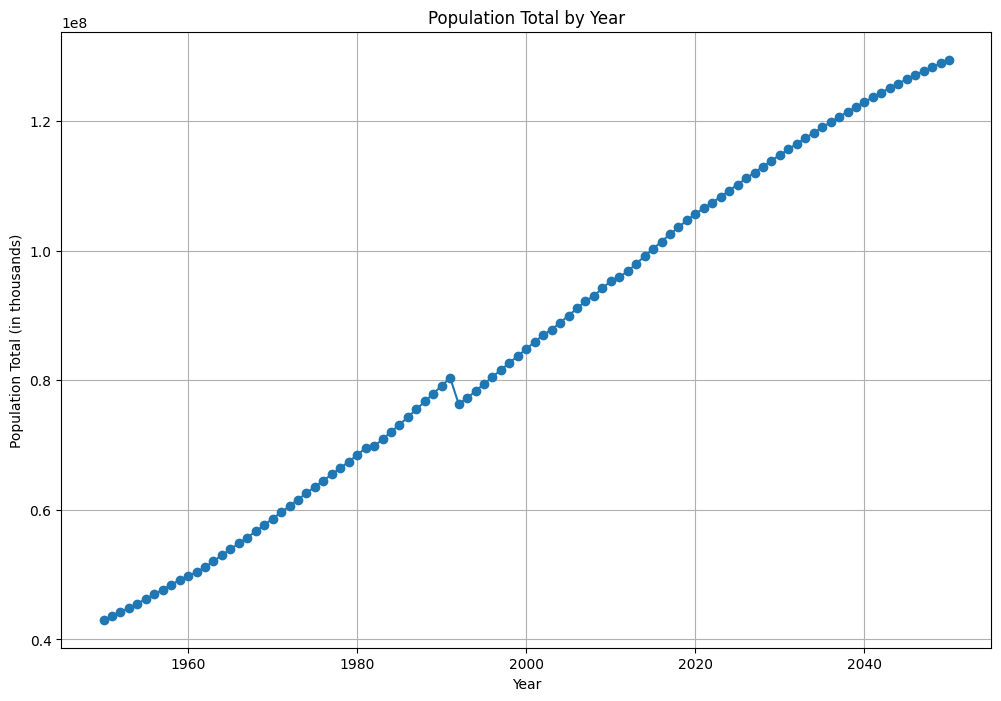

In [58]:
# 選擇年份和人口總數的欄位
year_population_data = df_Total_NMiss[['Year', 'Absolute value in thousands']]

# 按年份匯總，計算每年的全球人口總數
population_by_year = year_population_data.groupby('Year')['Absolute value in thousands'].sum()

# 繪製每年人口總數的折線圖
plt.figure(figsize=(12, 8))
plt.plot(population_by_year.index, population_by_year.values, marker='o')
plt.title('Population Total by Year')
plt.xlabel('Year')
plt.ylabel('Population Total (in thousands)')
plt.grid(True)
plt.show()

### 繪製男女性別比率圖

Sex Label    Both sexes        Female          Male  Sex Ratio (M/F)
Year                                                                
1950       7.893447e+07  4.720688e+07  4.726362e+07         1.001202
1951       8.006957e+07  4.776882e+07  4.783678e+07         1.001423
1952       8.129294e+07  4.837129e+07  4.845767e+07         1.001786
1953       8.259056e+07  4.901299e+07  4.911359e+07         1.002053
1954       8.393175e+07  4.967241e+07  4.979536e+07         1.002475
...                 ...           ...           ...              ...
2046       2.522060e+08  1.285017e+08  1.288965e+08         1.003072
2047       2.534563e+08  1.291467e+08  1.295019e+08         1.002750
2048       2.546629e+08  1.297694e+08  1.300858e+08         1.002438
2049       2.558230e+08  1.303685e+08  1.306467e+08         1.002134
2050       2.569355e+08  1.309439e+08  1.311839e+08         1.001832

[101 rows x 4 columns]


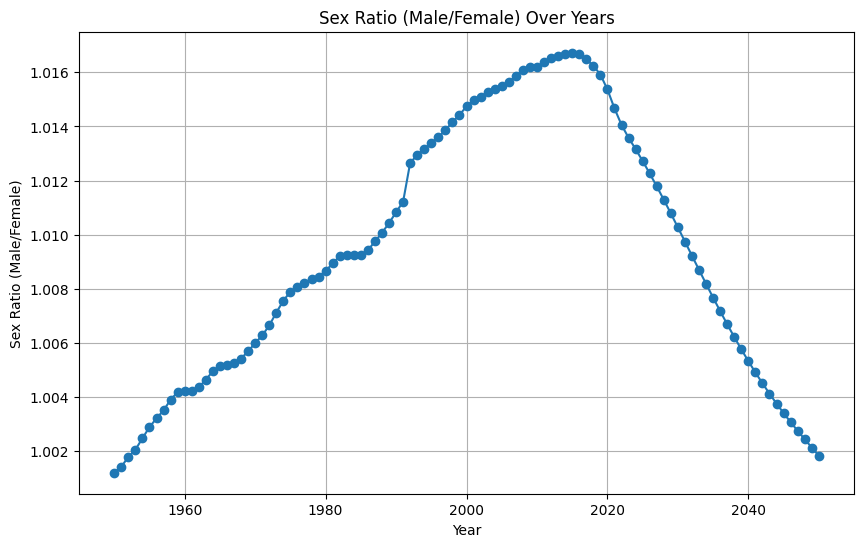

In [59]:
sex_year_data = df_AgeSex_NMiss[['Year', 'Sex Label', 'Absolute value in thousands']]

# 根據性別和年份匯總人口數據
sex_ratio = sex_year_data.groupby(['Year', 'Sex Label'])['Absolute value in thousands'].sum().unstack()

# 計算男女性別比（男性人口數 / 女性人口數）
sex_ratio['Sex Ratio (M/F)'] = sex_ratio['Male'] / sex_ratio['Female']
print(sex_ratio)

plt.figure(figsize=(10, 6))
plt.plot(sex_ratio.index, sex_ratio['Sex Ratio (M/F)'], marker='o')
plt.title('Sex Ratio (Male/Female) Over Years')
plt.xlabel('Year')
plt.ylabel('Sex Ratio (Male/Female)')
plt.grid(True)
plt.show()

### 繪製人口增長率趨勢圖

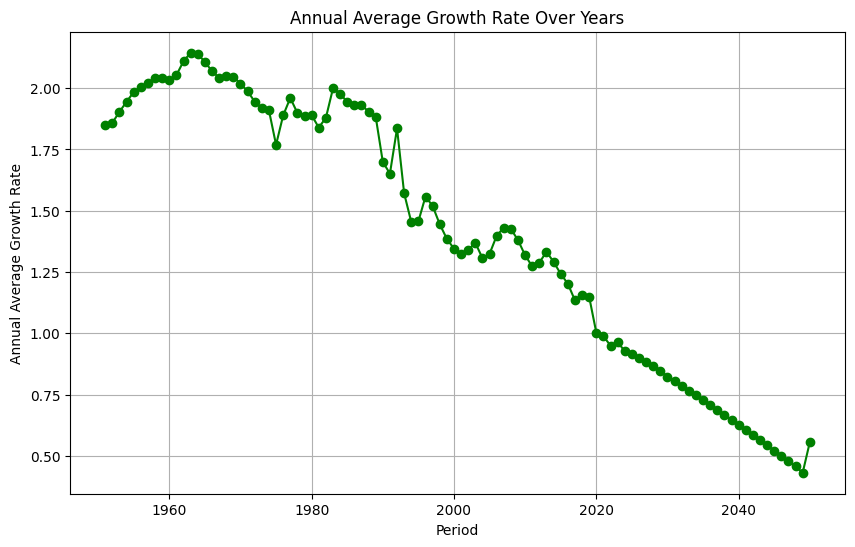

In [61]:
growth_rate = df_Growth_NMiss.groupby('End_Year')['Annual average growth rate'].mean()

plt.figure(figsize=(10, 6))
growth_rate.plot(kind='line', marker='o', color='green')
plt.title('Annual Average Growth Rate Over Years')
plt.xlabel('Period')
plt.ylabel('Annual Average Growth Rate')
plt.grid(True)
plt.show()

### 繪製勞動人口比率圖

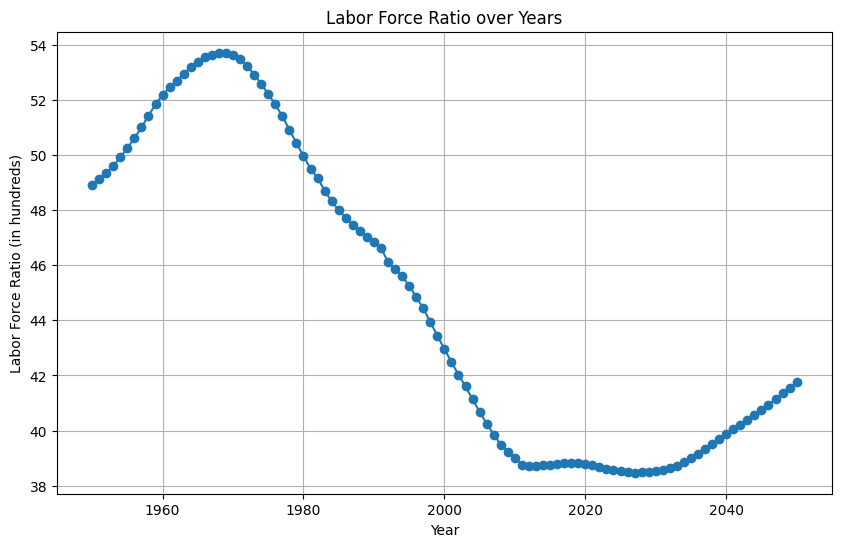

In [16]:
df_Dependency_NMiss['Labor Force Participation Rate'] = df_Dependency_NMiss['Persons per hundred persons aged 15-64']

# 按年份計算每年勞動人口比率
annual_labor_force_rate = df_Dependency_NMiss.groupby('Year')['Labor Force Participation Rate'].mean().reset_index()

# 繪製每年勞動人口比率圖
plt.figure(figsize=(10, 6))
plt.plot(annual_labor_force_rate['Year'], annual_labor_force_rate['Labor Force Participation Rate'], marker='o')
plt.title('Labor Force Ratio over Years')
plt.xlabel('Year')
plt.ylabel('Labor Force Ratio (in hundreds)')
plt.grid(True)
plt.show()

## 離群值處理

In [3]:
merged_data = pd.read_csv("./dataset/Finish_Preprocessing_PopData.csv")
merged_data.head()

,Year,Economy,Economy Label,Sex,Sex Label,AgeClass,AgeClass Label,Absolute value in thousands_age,Absolute value in thousands_total,Urban population as percentage of total population,Series,Series Label,Persons per hundred persons aged 15-64,Annual average growth rate
0,1951,1,Individual economies,0,Both sexes,0,All age classes,0.00173,0.028444,0.551551,7120,Total dependency ratio,0.361365,0.488112
1,1951,1,Individual economies,0,Both sexes,0,All age classes,0.00173,0.028444,0.551551,7121,Old-age dependency ratio,0.361365,0.488112
2,1951,1,Individual economies,0,Both sexes,0,All age classes,0.00173,0.028444,0.551551,7122,Child dependency ratio,0.361365,0.488112
3,1951,1,Individual economies,0,Both sexes,1,[0-4],0.00173,0.028444,0.551551,7120,Total dependency ratio,0.361365,0.488112
4,1951,1,Individual economies,0,Both sexes,1,[0-4],0.00173,0.028444,0.551551,7121,Old-age dependency ratio,0.361365,0.488112


In [4]:
numeric_cols = ['Absolute value in thousands_age', 
                'Absolute value in thousands_total', 
                'Persons per hundred persons aged 15-64', 
                'Annual average growth rate',
                'Urban population as percentage of total population']
numeric_data = merged_data[numeric_cols]

       Absolute value in thousands_age  Absolute value in thousands_total  \
count                     6.292836e+06                       6.292836e+06   
mean                      1.750817e-03                       2.888023e-02   
std                       1.458518e-02                       8.993664e-02   
min                       0.000000e+00                       8.579234e-08   
25%                       7.376287e-07                       1.015153e-04   
50%                       2.215971e-05                       1.124182e-03   
75%                       4.040125e-04                       1.717047e-02   
max                       1.000000e+00                       1.000000e+00   

       Persons per hundred persons aged 15-64  Annual average growth rate  \
count                            6.292836e+06                6.292836e+06   
mean                             3.603200e-01                4.881967e-01   
std                              2.256712e-01                2.507165e-02  

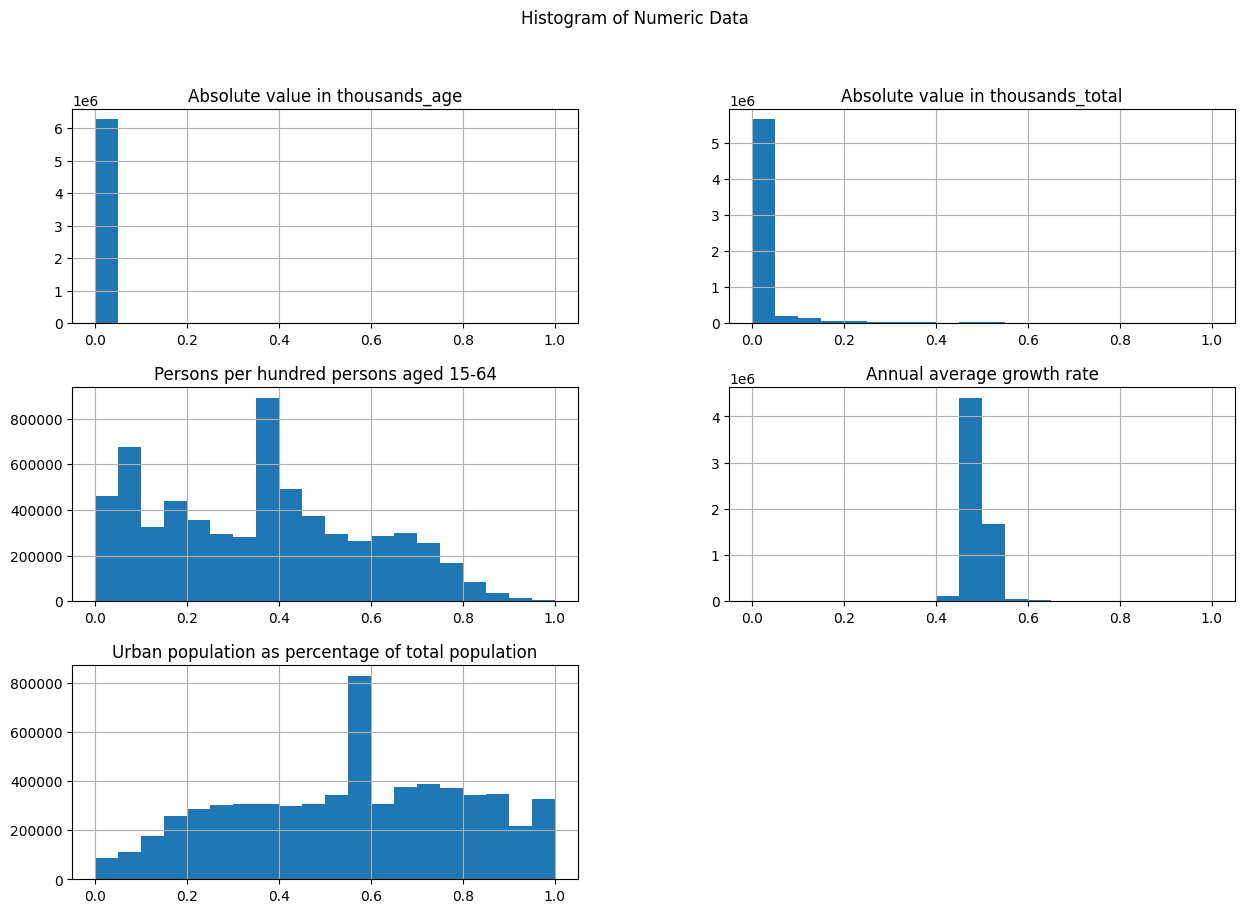

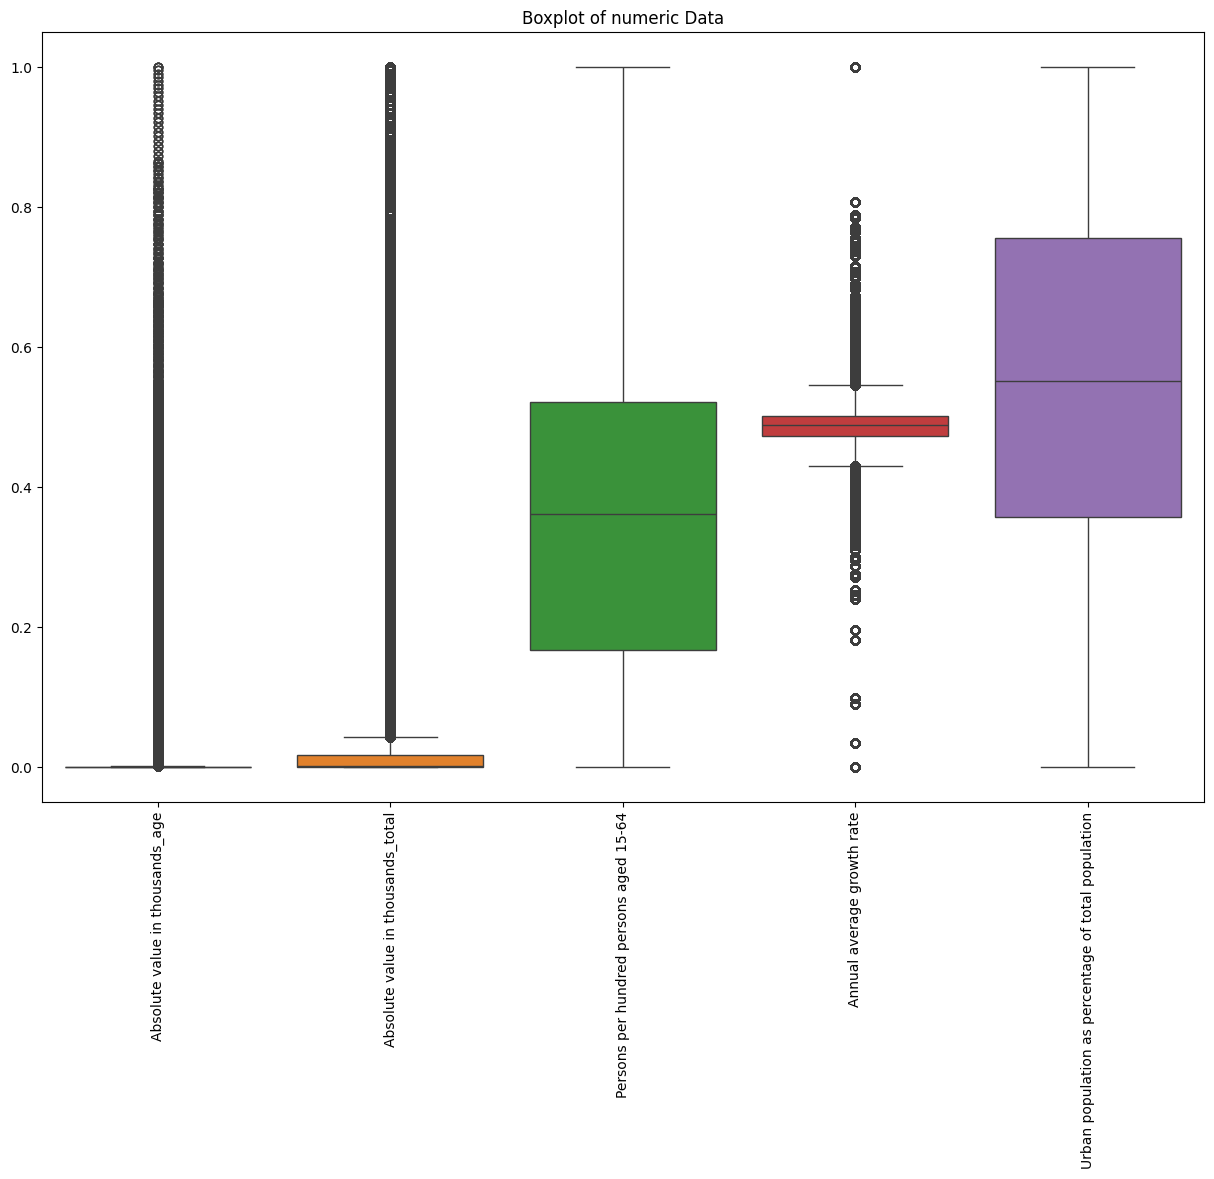

In [5]:
# 描述性統計分析
descriptive_stats = numeric_data.describe()
print(descriptive_stats)

# 繪製數據分佈圖（直方圖）
numeric_data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numeric Data')
plt.show()

# 繪製箱型圖（箱線圖）以識別離群值
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data)
plt.title('Boxplot of numeric Data')
plt.xticks(rotation=90)
plt.show()

In [106]:
# 使用IQR方法識別離群值
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers

# 標記離群值
outliers = detect_outliers(numeric_data)

# 計算每個欄位中的離群值數量及其比例
outliers_count = outliers.sum()
total_count = numeric_data.shape[0]
outliers_ratio = outliers_count / total_count

print("[ Outliers count ]")
print(outliers_count)
print("\n[ Outliers ratio ]")
print(outliers_ratio)

[ Outliers count ]
Absolute value in thousands_age                       1255509
Absolute value in thousands_total                      699534
Persons per hundred persons aged 15-64                      0
Annual average growth rate                             133650
Urban population as percentage of total population          0
dtype: int64

[ Outliers ratio ]
Absolute value in thousands_age                       0.199514
Absolute value in thousands_total                     0.111164
Persons per hundred persons aged 15-64                0.000000
Annual average growth rate                            0.021238
Urban population as percentage of total population    0.000000
dtype: float64


               Year       Economy           Sex      AgeClass  \
count  6.292836e+06  6.292836e+06  6.292836e+06  6.292836e+06   
mean   2.001226e+03  1.071332e+03  1.000000e+00  1.050000e+01   
std    2.905751e+01  1.519694e+03  8.164966e-01  6.344289e+00   
min    1.951000e+03  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.976000e+03  2.680000e+02  0.000000e+00  5.000000e+00   
50%    2.002000e+03  5.580000e+02  1.000000e+00  1.050000e+01   
75%    2.026000e+03  8.260000e+02  2.000000e+00  1.600000e+01   
max    2.050000e+03  5.706000e+03  2.000000e+00  2.100000e+01   

       Absolute value in thousands_age  Absolute value in thousands_total  \
count                     6.292836e+06                       6.292836e+06   
mean                      6.828460e-05                       5.413838e-03   
std                       1.535858e-04                       9.703433e-03   
min                       0.000000e+00                       8.579234e-08   
25%                       7.3

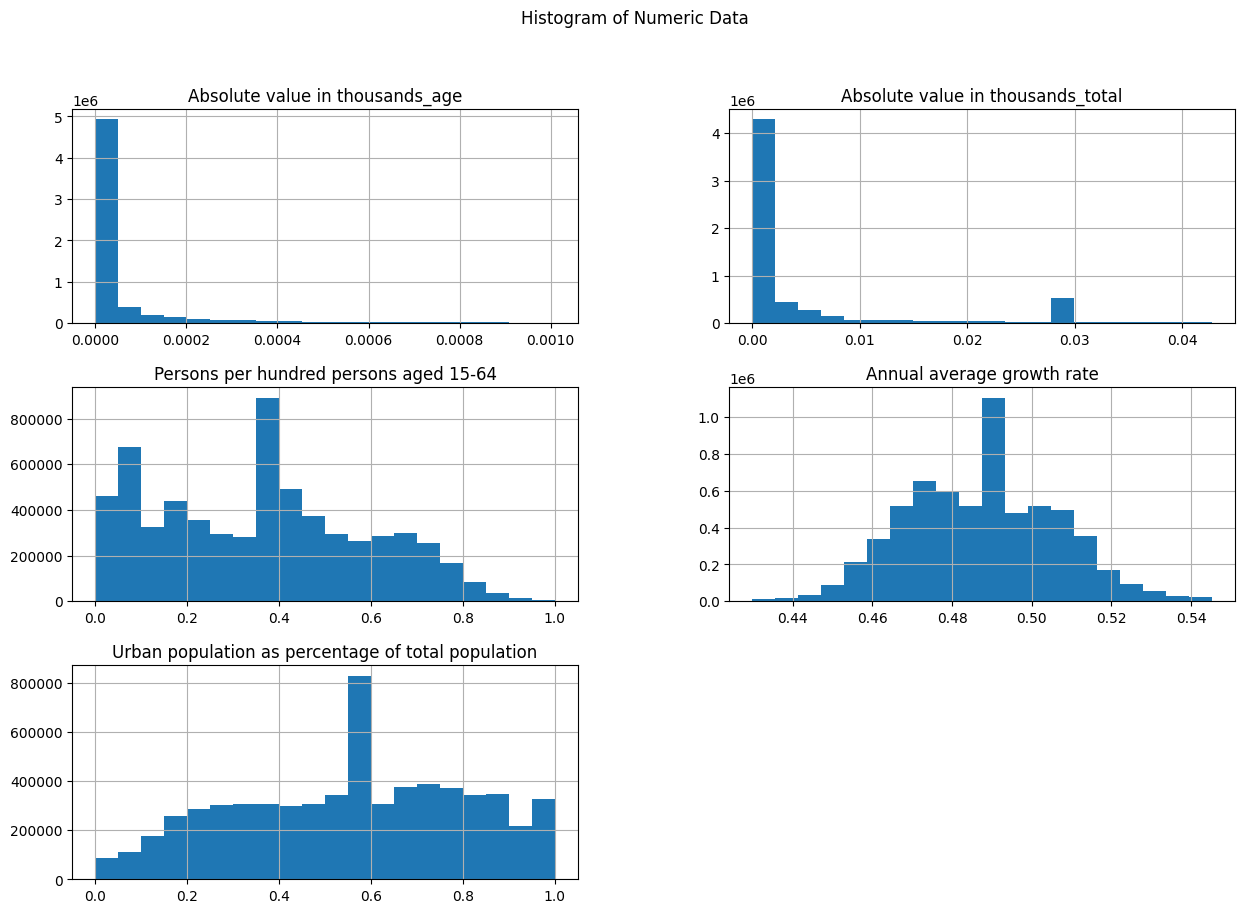

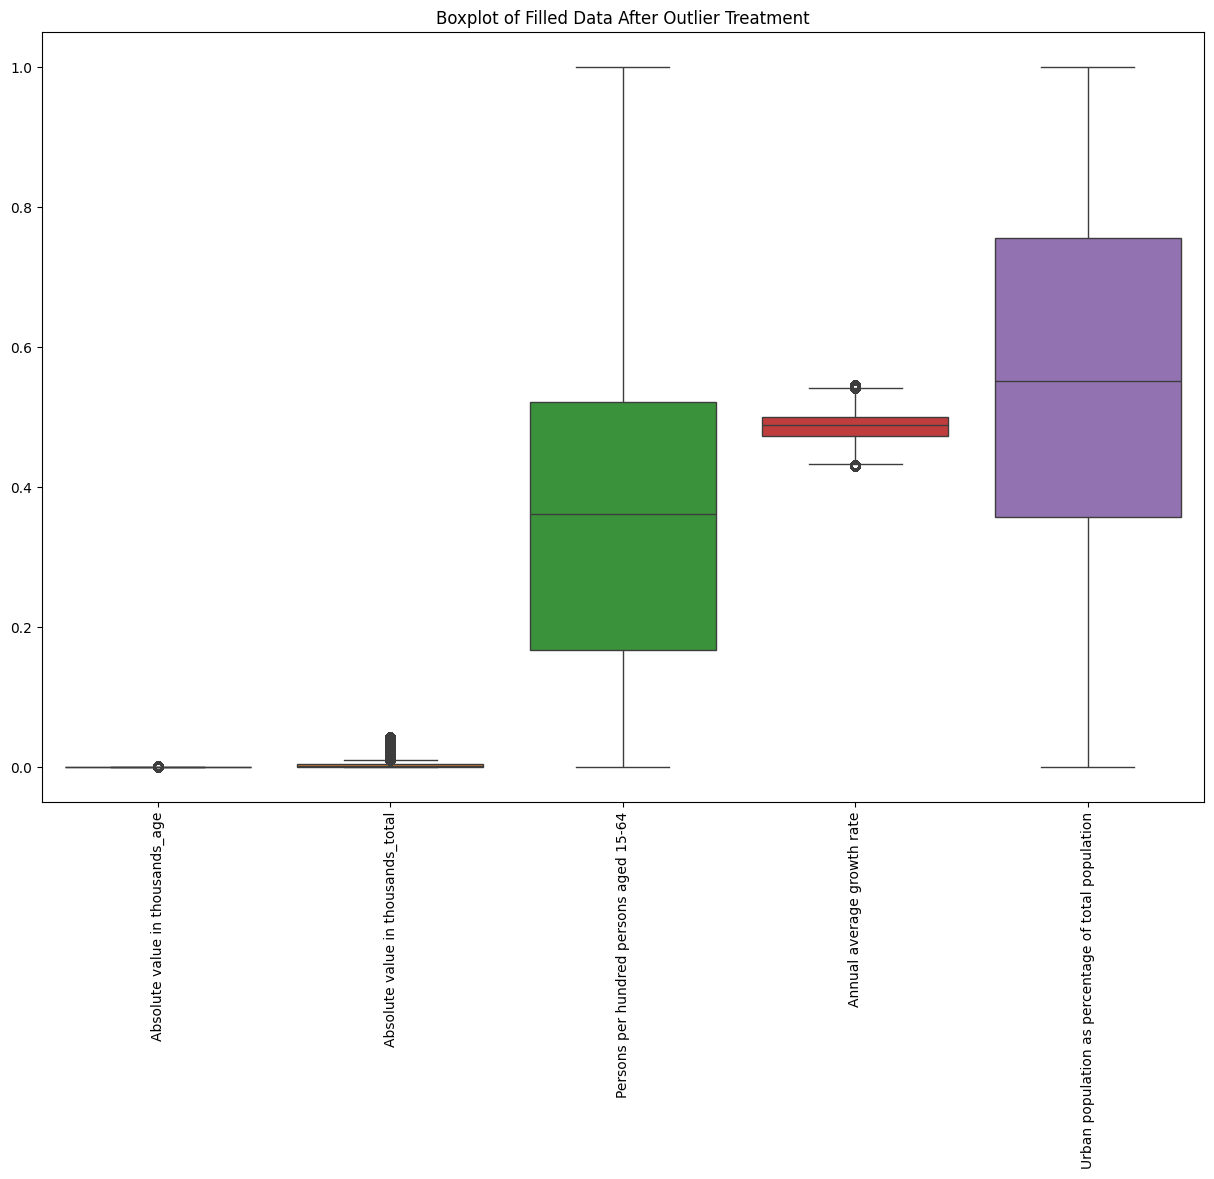

In [108]:
# 創建一個新的數據框來填補離群值
filled_data = merged_data.copy()

# 用中位數填補離群值
for feature in numeric_cols:
    median = filled_data[feature].median()
    filled_data.loc[outliers[feature], feature] = median
# for column in filled_data.columns:
#     median_value = filled_data[column].median()
#     filled_data.loc[outliers[column], column] = median_value

# 檢查處理後的數據
print(filled_data.describe())

# 繪製數據分佈圖（直方圖）
filled_numeric_data = filled_data[numeric_cols]
filled_numeric_data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numeric Data')
plt.show()

# 繪製箱型圖（箱線圖）以識別離群值
plt.figure(figsize=(15, 10))
sns.boxplot(data=filled_numeric_data)
plt.title('Boxplot of Filled Data After Outlier Treatment')
plt.xticks(rotation=90)
plt.show()

In [109]:
# filled_data.to_csv('./dataset/After_OutlierProcess_PopData.csv', index=False)

## 勞動人口(15~64)比率、男女性別比、人口總數
## 預測人口增長率是否大於全球平均

In [6]:
merged_data = pd.read_csv("./dataset/Finish_Preprocessing_PopData.csv")
merged_data.head()

,Year,Economy,Economy Label,Sex,Sex Label,AgeClass,AgeClass Label,Absolute value in thousands_age,Absolute value in thousands_total,Urban population as percentage of total population,Series,Series Label,Persons per hundred persons aged 15-64,Annual average growth rate
0,1951,1,Individual economies,0,Both sexes,0,All age classes,0.00173,0.028444,0.551551,7120,Total dependency ratio,0.361365,0.488112
1,1951,1,Individual economies,0,Both sexes,0,All age classes,0.00173,0.028444,0.551551,7121,Old-age dependency ratio,0.361365,0.488112
2,1951,1,Individual economies,0,Both sexes,0,All age classes,0.00173,0.028444,0.551551,7122,Child dependency ratio,0.361365,0.488112
3,1951,1,Individual economies,0,Both sexes,1,[0-4],0.00173,0.028444,0.551551,7120,Total dependency ratio,0.361365,0.488112
4,1951,1,Individual economies,0,Both sexes,1,[0-4],0.00173,0.028444,0.551551,7121,Old-age dependency ratio,0.361365,0.488112


In [7]:
pre_2023_data = merged_data[merged_data['Year'] <=2023]

pre_2023_data.tail()

,Year,Economy,Economy Label,Sex,Sex Label,AgeClass,AgeClass Label,Absolute value in thousands_age,Absolute value in thousands_total,Urban population as percentage of total population,Series,Series Label,Persons per hundred persons aged 15-64,Annual average growth rate
4563103,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,20,[95-99],0.000217,0.143252,0.816379,7121,Old-age dependency ratio,0.228226,0.47114
4563104,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,20,[95-99],0.000217,0.143252,0.816379,7122,Child dependency ratio,0.211891,0.47114
4563105,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,21,[100+],0.000038,0.143252,0.816379,7120,Total dependency ratio,0.441733,0.47114
4563106,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,21,[100+],0.000038,0.143252,0.816379,7121,Old-age dependency ratio,0.228226,0.47114
4563107,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,21,[100+],0.000038,0.143252,0.816379,7122,Child dependency ratio,0.211891,0.47114


### 男女性別比

In [8]:
pivot_data = pre_2023_data.pivot_table(values='Absolute value in thousands_age', index=['Year', 'Economy', 'Economy Label'], columns='Sex Label', aggfunc='sum').reset_index()

# 計算性別比（男性人口數/女性人口數）
pivot_data['Sex Ratio'] = pivot_data['Male'] / pivot_data['Female']

scaler = MinMaxScaler()
pivot_data['Sex Ratio'] = scaler.fit_transform(pivot_data['Sex Ratio'].values.reshape(-1, 1))

# 將性別比數據合併回原始數據
pre_2023_data = pre_2023_data[pre_2023_data['Sex Label'] == 'Both sexes']
pre_2023_data = pre_2023_data.merge(pivot_data[['Year', 'Economy', 'Economy Label', 'Sex Ratio']], on=['Year', 'Economy', 'Economy Label'])

### 全球人口平均增長率

In [9]:
global_avg_growth_rate = pre_2023_data['Annual average growth rate'].mean()
print(f"全球平均人口增長率: {global_avg_growth_rate}")

pre_2023_data['Above_Avg_Growth'] = (pre_2023_data['Annual average growth rate'] > global_avg_growth_rate).astype(int)

全球平均人口增長率: 0.49276984053538714


### 切割訓練集和測試集的特徵與標籤

In [12]:
train_data = pre_2023_data[pre_2023_data['Year'] <= 2000]
test_data = pre_2023_data[pre_2023_data['Year'] > 2000]

In [15]:
# features
X_train = train_data[['Persons per hundred persons aged 15-64', 'Sex Ratio', 'Absolute value in thousands_total']]
X_test = test_data[['Persons per hundred persons aged 15-64', 'Sex Ratio', 'Absolute value in thousands_total']]

# labels
y_train = train_data['Above_Avg_Growth']
y_test = test_data['Above_Avg_Growth']

### 使用決策樹進行分類分析

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3 ,random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8349358974358975
              precision    recall  f1-score   support

           0       0.87      0.89      0.88    341220
           1       0.74      0.71      0.73    152988

    accuracy                           0.83    494208
   macro avg       0.81      0.80      0.80    494208
weighted avg       0.83      0.83      0.83    494208



#### 特徵重要性

In [18]:
dt_feature_importances = dt_model.feature_importances_
importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importances
})

importance_dt = importance_dt.sort_values(by='Importance', ascending=False)
importance_dt.head()

,Feature,Importance
0,Persons per hundred persons aged 15-64,0.795259
1,Sex Ratio,0.140847
2,Absolute value in thousands_total,0.063894


#### 繪製決策樹分類圖
Samples:當前節點樣本數、Value:[屬於類別0之樣本, 屬於類別1之樣本]、Class:當前節點之預測類別

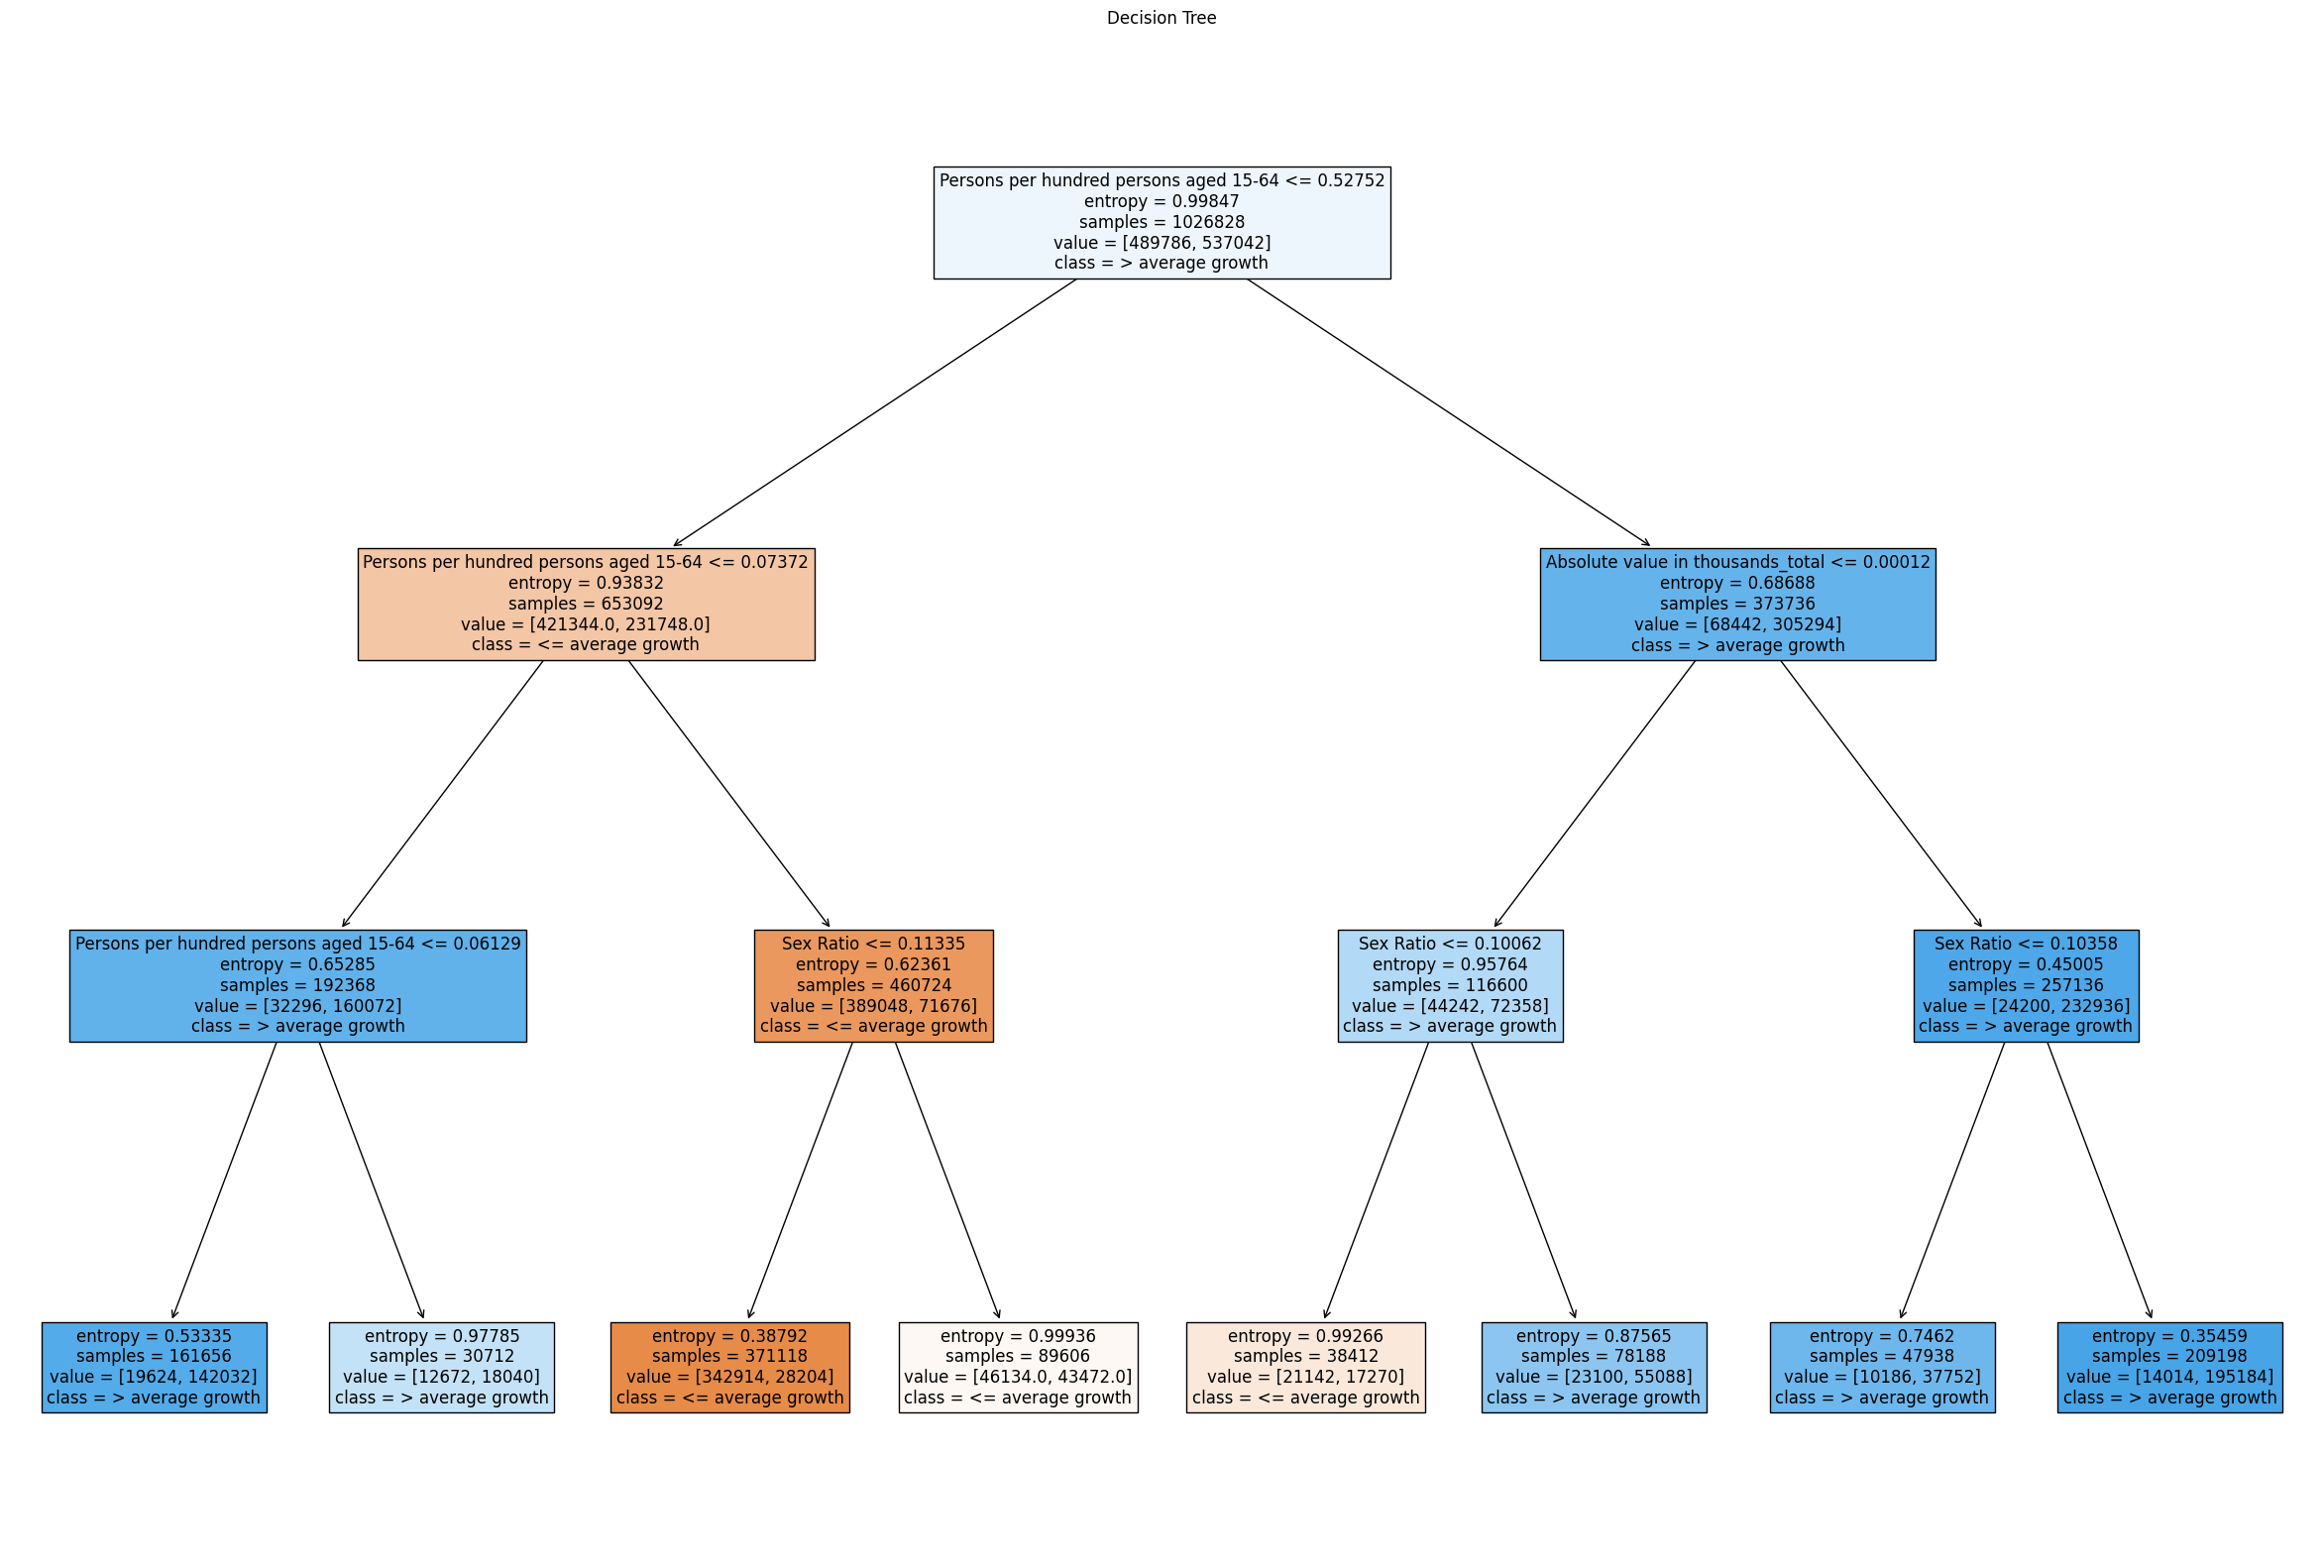

In [19]:
plt.figure(figsize=(30, 20))
tree.plot_tree(dt_model, feature_names=X_train.columns, class_names=['<= average growth', '> average growth'], filled=True, fontsize=12, precision=5)
plt.title('Decision Tree')
plt.savefig('./result/decision_tree.png', dpi=300)
plt.show()

### 使用隨機森林進行分類分析

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7106036324786325
              precision    recall  f1-score   support

           0       0.91      0.65      0.76    341220
           1       0.52      0.85      0.64    152988

    accuracy                           0.71    494208
   macro avg       0.71      0.75      0.70    494208
weighted avg       0.79      0.71      0.72    494208



#### 特徵重要性

In [25]:
rf_feature_importances = rf_model.feature_importances_
importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
})

importance_rf = importance_rf.sort_values(by='Importance', ascending=False)
importance_rf.head()

,Feature,Importance
0,Persons per hundred persons aged 15-64,0.439113
1,Sex Ratio,0.378349
2,Absolute value in thousands_total,0.182538


#### 繪製隨機森林中單棵決策樹

c:\ProgramData\anaconda3\envs\Python310\lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\ProgramData\anaconda3\envs\Python310\lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\ProgramData\anaconda3\envs\Python310\lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\ProgramData\anaconda3\envs\Python310\lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\ProgramData\anaconda3\envs\Python310\lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA})

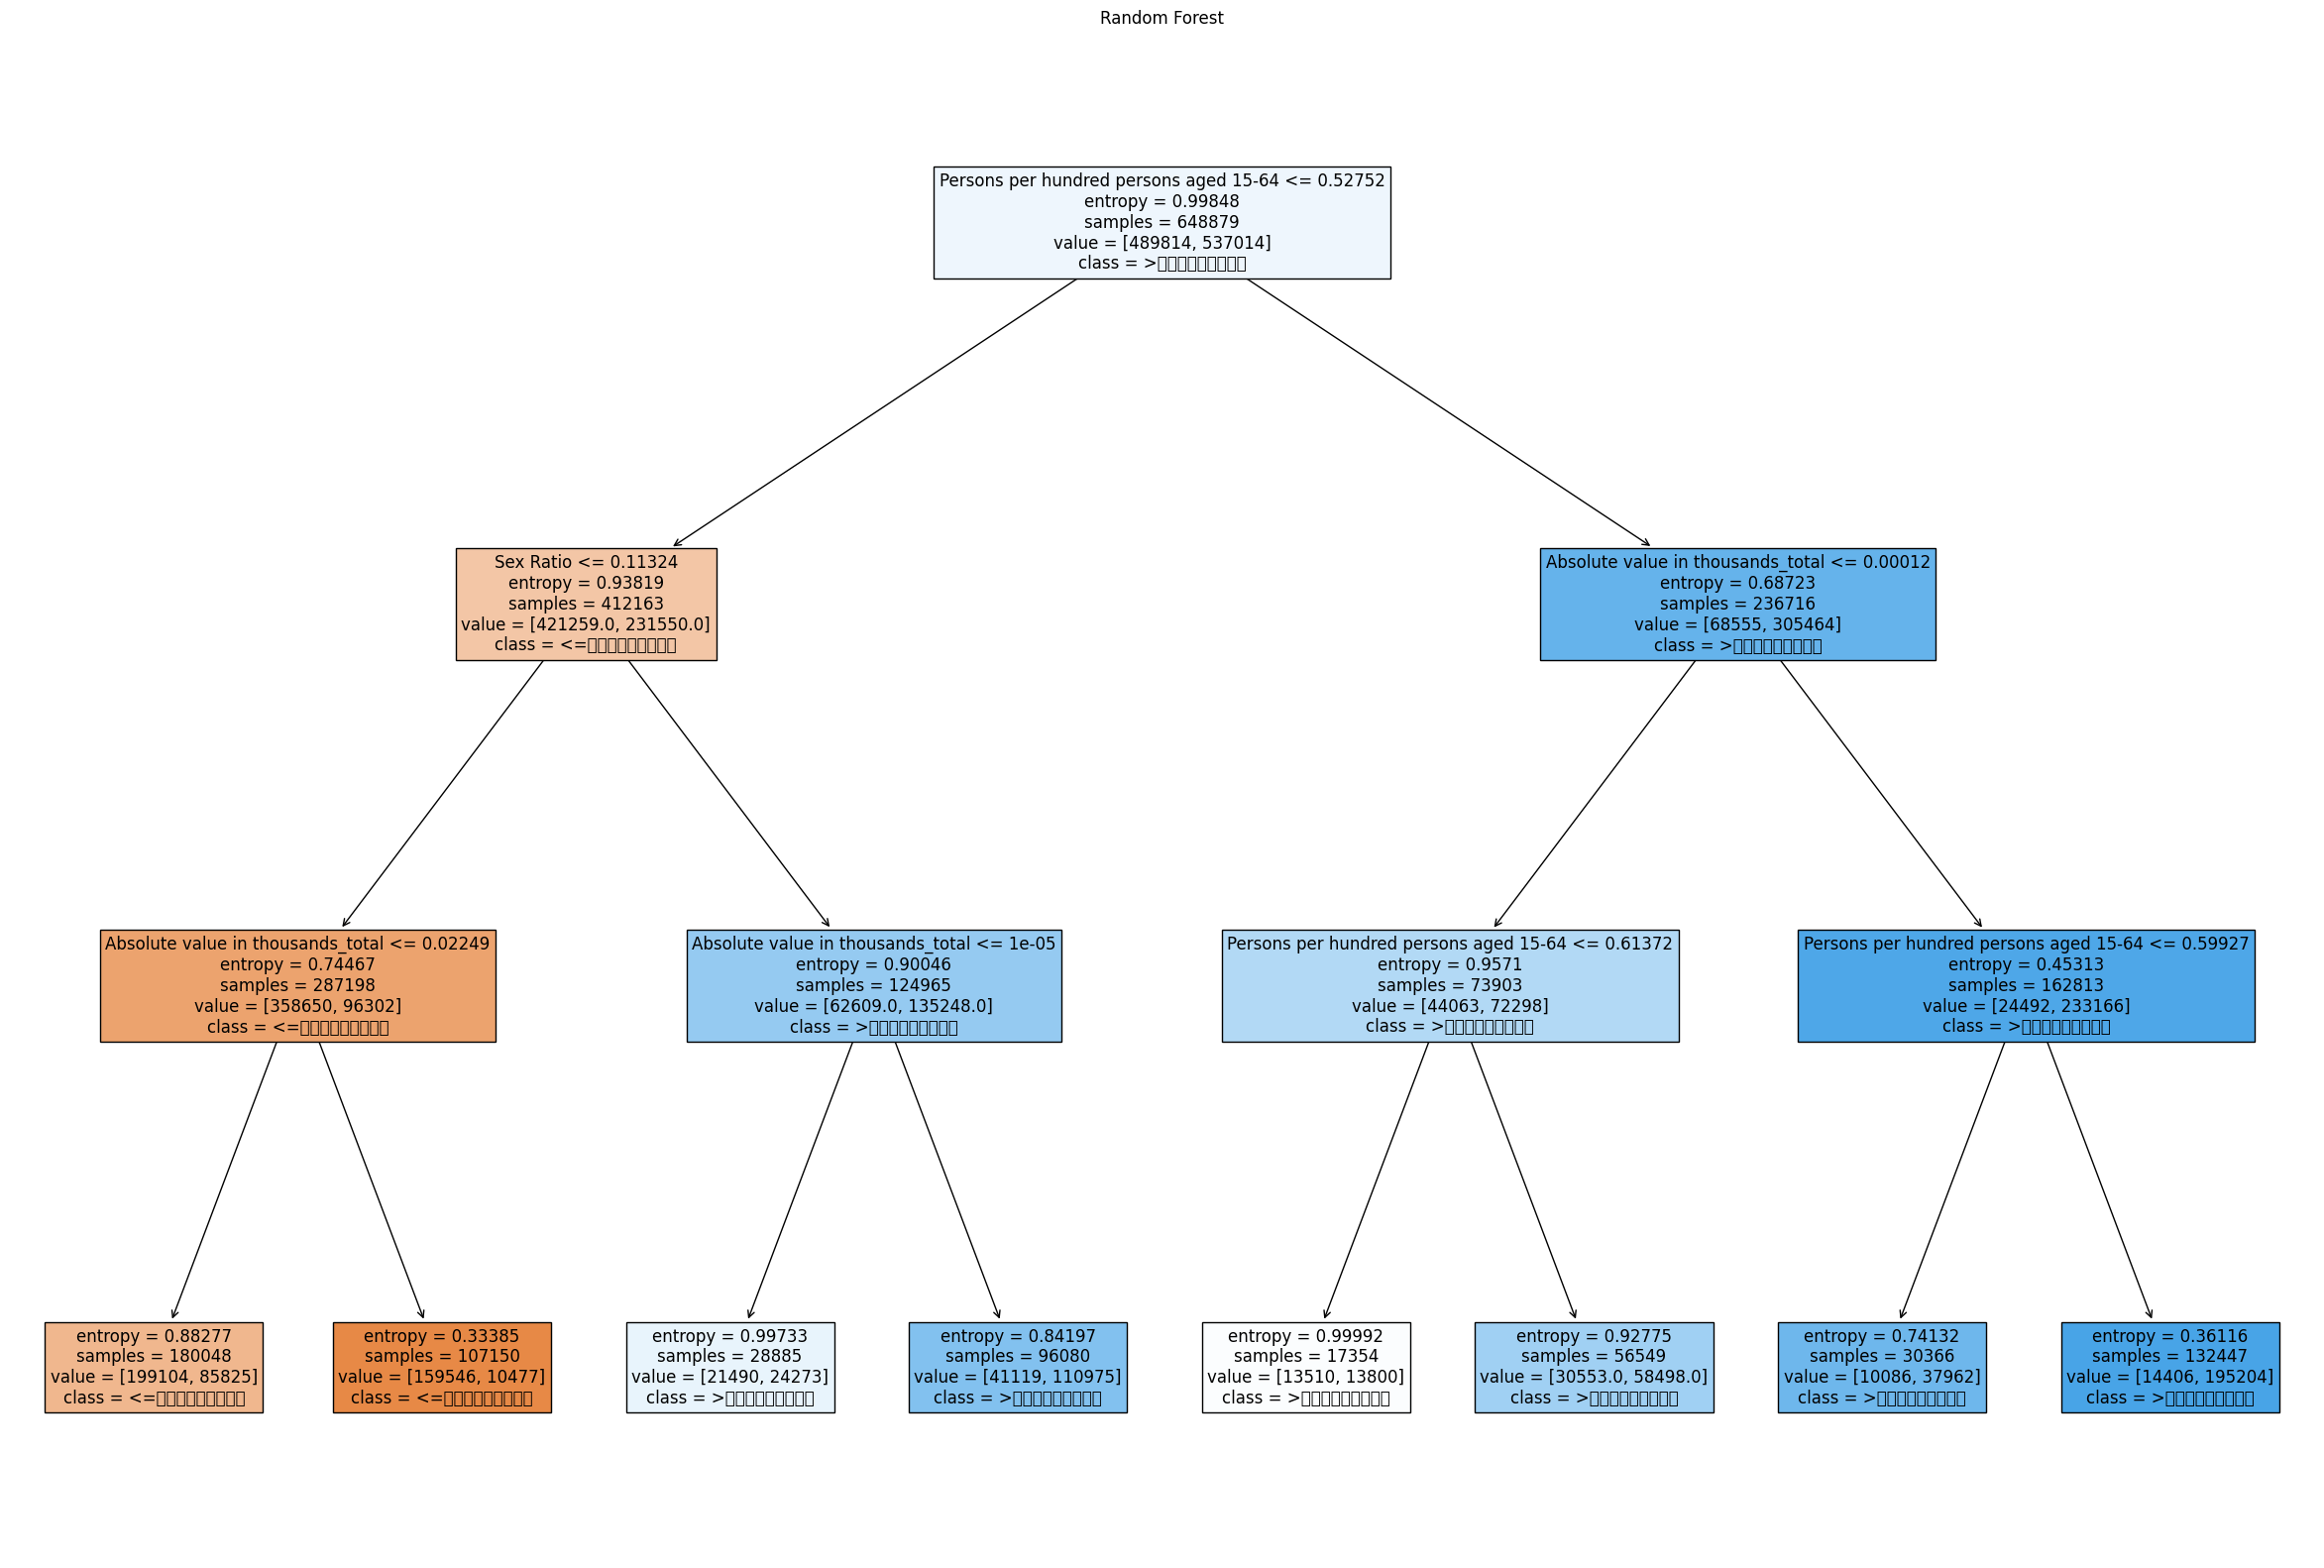

In [26]:
single_tree = rf_model.estimators_[0]

plt.figure(figsize=(30, 20))
tree.plot_tree(single_tree, feature_names=X_train.columns, class_names=['<=全球平均人口增長率', '>全球平均人口增長率'], filled=True, fontsize=12, precision=5)
plt.title('Random Forest')
plt.savefig('./result/randon_forest.png', dpi=300)
plt.show()

### 比較
- max_depth=3 -> decision tree: 0.835、random forest: 0.711
- max_depth=5 -> decision tree: 0.846、random forest: 0.773
- max_depth=7 -> decision tree: 0.845、random forest: 0.803
- max_depth=10 -> decision tree: 0.837、random forest: 0.828
- max_depth=15 -> decision tree: 0.798、random forest: 0.830

## 人口總數、男女性別比、勞動人口比率和人口增長率
## 利用K-means將經濟體進行分群

In [2]:
merged_data = pd.read_csv("./dataset/After_OutlierProcess_PopData.csv")
merged_data.head()

,Year,Economy,Economy Label,Sex,Sex Label,AgeClass,AgeClass Label,Absolute value in thousands_age,Absolute value in thousands_total,Urban population as percentage of total population,Series,Series Label,Persons per hundred persons aged 15-64,Annual average growth rate
0,1951,1,Individual economies,0,Both sexes,0,All age classes,0.000022,0.028444,0.551551,7120,Total dependency ratio,0.361365,0.488112
1,1951,1,Individual economies,0,Both sexes,0,All age classes,0.000022,0.028444,0.551551,7121,Old-age dependency ratio,0.361365,0.488112
2,1951,1,Individual economies,0,Both sexes,0,All age classes,0.000022,0.028444,0.551551,7122,Child dependency ratio,0.361365,0.488112
3,1951,1,Individual economies,0,Both sexes,1,[0-4],0.000022,0.028444,0.551551,7120,Total dependency ratio,0.361365,0.488112
4,1951,1,Individual economies,0,Both sexes,1,[0-4],0.000022,0.028444,0.551551,7121,Old-age dependency ratio,0.361365,0.488112


In [4]:
pre_2023_data = merged_data[merged_data['Year'] <=2023]
pre_2023_data.tail()

,Year,Economy,Economy Label,Sex,Sex Label,AgeClass,AgeClass Label,Absolute value in thousands_age,Absolute value in thousands_total,Urban population as percentage of total population,Series,Series Label,Persons per hundred persons aged 15-64,Annual average growth rate
4563103,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,20,[95-99],0.000217,0.001124,0.816379,7121,Old-age dependency ratio,0.228226,0.47114
4563104,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,20,[95-99],0.000217,0.001124,0.816379,7122,Child dependency ratio,0.211891,0.47114
4563105,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,21,[100+],0.000038,0.001124,0.816379,7120,Total dependency ratio,0.441733,0.47114
4563106,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,21,[100+],0.000038,0.001124,0.816379,7121,Old-age dependency ratio,0.228226,0.47114
4563107,2023,3905,OECD (Organisation for Economic Cooperation an...,1,Female,21,[100+],0.000038,0.001124,0.816379,7122,Child dependency ratio,0.211891,0.47114


### 男女性別比

In [5]:
pivot_data = pre_2023_data.pivot_table(values='Absolute value in thousands_age', index=['Year', 'Economy', 'Economy Label'], columns='Sex Label', aggfunc='sum').reset_index()

# 計算性別比（男性人口數/女性人口數）
pivot_data['Sex Ratio'] = pivot_data['Male'] / pivot_data['Female']
scaler = MinMaxScaler()
pivot_data['Sex Ratio'] = scaler.fit_transform(pivot_data['Sex Ratio'].values.reshape(-1, 1))

# 將性別比數據合併回原始數據
pre_2023_data = pre_2023_data[pre_2023_data['Sex Label'] == 'Both sexes']
pre_2023_data = pre_2023_data.merge(pivot_data[['Year', 'Economy', 'Economy Label', 'Sex Ratio']], on=['Year', 'Economy', 'Economy Label'])

### 全球人口平均增長率

In [6]:
global_avg_growth_rate = pre_2023_data['Annual average growth rate'].mean()
print(f"全球平均人口增長率: {global_avg_growth_rate}")

全球平均人口增長率: 0.4914706724055152


### 標準化特徵

In [7]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

features = ['Absolute value in thousands_total', 'Sex Ratio', 'Persons per hundred persons aged 15-64', 'Annual average growth rate']

# pre_2023_data[features] = scaler.fit_transform(pre_2023_data[features])

### 使用Kmeans進行分群
- 分5群是因為我預計期望可以分成: 亞洲、歐洲、美洲、大洋洲、非洲
- 原為七大洲，但我將北美洲與南美洲合併，南極洲則無資料

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
pre_2023_data['Cluster'] = kmeans.fit_predict(pre_2023_data[features])

c:\ProgramData\anaconda3\envs\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系統找不到指定的檔案。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\envs\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\ProgramData\anaconda3\envs\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\ProgramData\anaconda3\envs\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\envs\Python310\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


### 顯示每個分群中的國家

In [9]:
for cluster in pre_2023_data['Cluster'].unique():
    countries_in_cluster = pre_2023_data[pre_2023_data['Cluster'] == cluster]['Economy Label'].unique()
    print(f"Cluster {cluster}:")
    print(countries_in_cluster)
    print("")

Cluster 0:
['Individual economies' 'Andorra' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Barbados' 'Belarus' 'Belgium' 'Benin' 'Bermuda'
 'Bonaire, Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Brunei Darussalam' 'Bulgaria' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, Macao SAR' 'Comoros' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus'
 'Czechia' 'Czechoslovakia' 'Denmark' 'Equatorial Guinea' 'Eritrea'
 'Estonia' 'Ethiopia' 'Faroe Islands' 'Finland' 'France'
 'France, metropolitan' 'French Guiana' 'Monaco' 'Gabon' 'Georgia'
 'Germany' 'Germany, Federal Republic of' 'Gibraltar' 'Greece' 'Guam'
 'Guinea' 'Guinea-Bissau' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Kazakhstan' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Lithuania'
 'Luxembourg' 'Malta' 'Marshall Islands'
 'Micronesia (Federated States of)' 'Moldova, Republic of' 'Mongolia'
 'Monten

### 結果分析

In [10]:
sse = kmeans.inertia_
print(f'總平方和(SSE): {sse}') # 1881082.7535948406

總平方和(SSE): 13751.674453476257


### 可視化分群結果

C:\Users\USER\AppData\Local\Temp\ipykernel_23072\2491902972.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


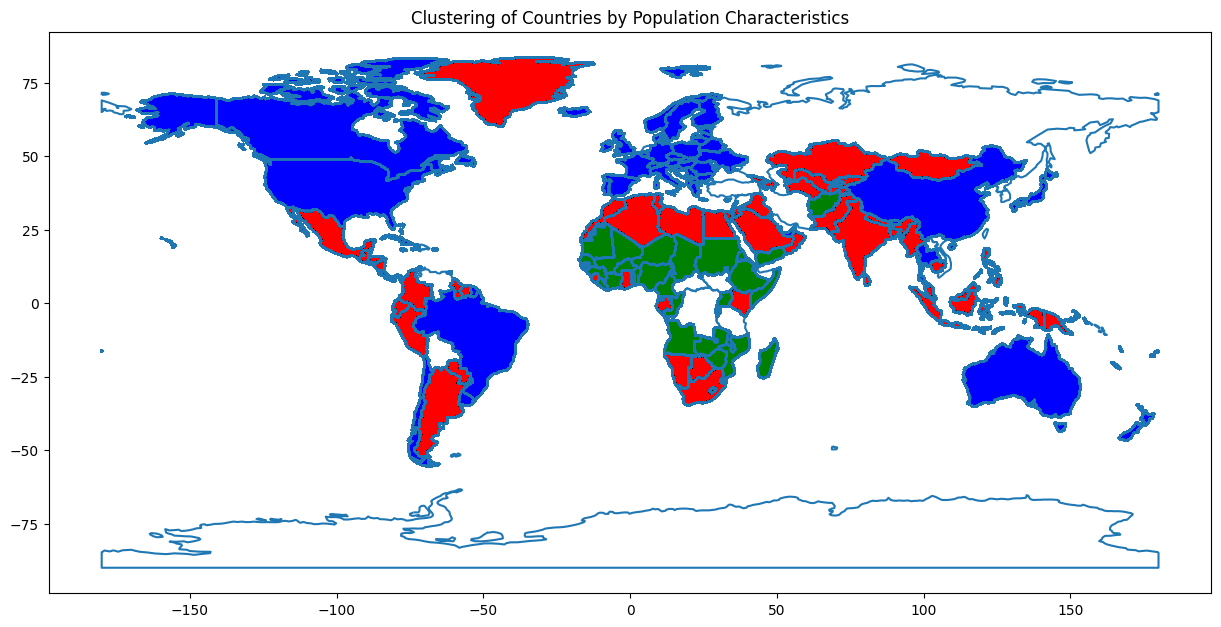

In [12]:
import geopandas as gpd
import matplotlib.colors as mcolors

# 載入地理數據
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 定義顏色映射
colors = ['red', 'green', 'blue']
color_map = {i: colors[i] for i in range(3)}

# 合併分群結果與地理數據
world = world.merge(pre_2023_data[['Economy Label', 'Cluster']], left_on='name', right_on='Economy Label', how='left')

# 繪製世界地圖，顯示各國的分群結果
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Cluster', ax=ax, legend=False, cmap=mcolors.ListedColormap(colors))
plt.title('Clustering of Countries by Population Characteristics')
plt.show()

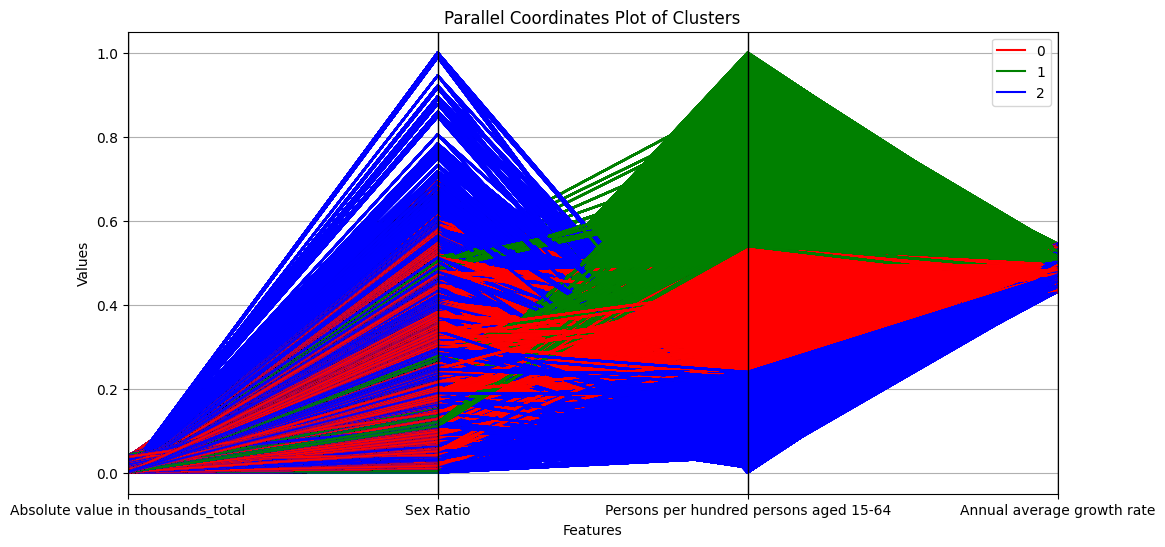

In [13]:
# 只保留數值型特徵和分群結果
columns_to_plot = ['Absolute value in thousands_total', 'Sex Ratio', 'Persons per hundred persons aged 15-64', 'Annual average growth rate', 'Cluster']
data_to_plot = pre_2023_data[columns_to_plot]

# 繪製平行坐標圖
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(data_to_plot, 'Cluster', color=colors)
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()